# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [24]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

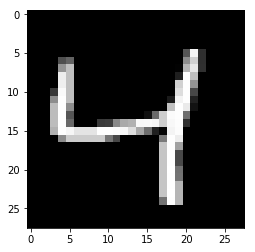

In [26]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [50]:
encoding_dim = 32 
# imageSize=mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32,(None,784),name="in")
targets_ = tf.placeholder(tf.float32,(None,784),name="out")

encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

logits = tf.layers.dense(encoded,784,activation=None)

decoded = tf.nn.sigmoid(logits,name="decode")

loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
cost = tf.reduce_mean(loss)

opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [51]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [52]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6909
Epoch: 1/20... Training loss: 0.6883
Epoch: 1/20... Training loss: 0.6850
Epoch: 1/20... Training loss: 0.6814
Epoch: 1/20... Training loss: 0.6770
Epoch: 1/20... Training loss: 0.6708
Epoch: 1/20... Training loss: 0.6634
Epoch: 1/20... Training loss: 0.6556
Epoch: 1/20... Training loss: 0.6460
Epoch: 1/20... Training loss: 0.6346
Epoch: 1/20... Training loss: 0.6233
Epoch: 1/20... Training loss: 0.6110
Epoch: 1/20... Training loss: 0.5958
Epoch: 1/20... Training loss: 0.5787
Epoch: 1/20... Training loss: 0.5609
Epoch: 1/20... Training loss: 0.5423
Epoch: 1/20... Training loss: 0.5258
Epoch: 1/20... Training loss: 0.5081
Epoch: 1/20... Training loss: 0.4895
Epoch: 1/20... Training loss: 0.4739
Epoch: 1/20... Training loss: 0.4556
Epoch: 1/20... Training loss: 0.4345
Epoch: 1/20... Training loss: 0.4230
Epoch: 1/20... Training loss: 0.4001
Epoch: 1/20... Training loss: 0.3958
Epoch: 1/20... Training loss: 0.3794
E

Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1957
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.2006
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1882
E

Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1622
Epoch: 2/20... Training loss: 0.1565
E

Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1421
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1347
E

Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1260
E

Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1092
Epoch: 4/20... Training loss: 0.1152
E

Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1093
E

Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.0997
Epoch: 6/20... Training loss: 0.1049
E

Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0983
E

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0995
E

Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0930
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0992
E

Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.1007
E

Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0985
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0989
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0888
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

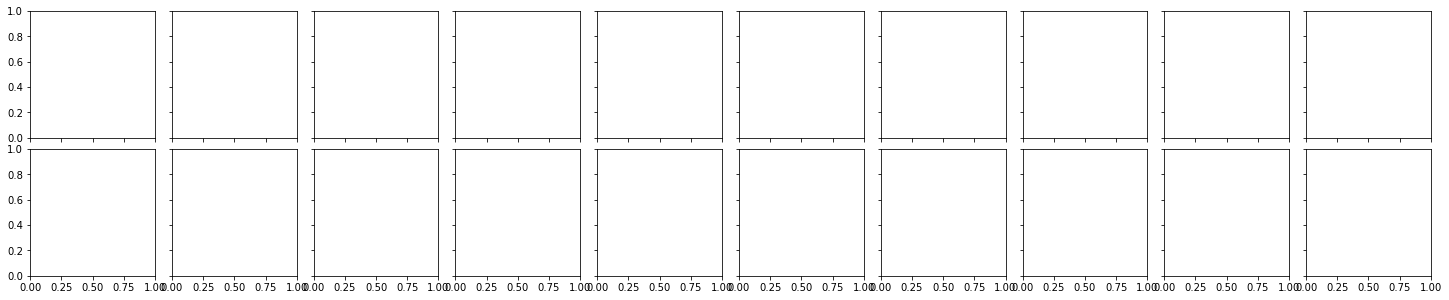

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

# for images, row in zip([in_imgs, reconstructed], axes):
#     for img, ax in zip(images, row):
#         print(ax)
#         ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.